# Active Learning with cross validation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import pipeline, preprocessing

%load_ext autoreload
%autoreload 2
from Methods import*

### Reading the dataset
First we need to read in the dataframe where we categorize the target in numbers and get the input features and labels

In [2]:
#read in dataframe
data = pd.read_csv('dataset_1.csv')

#define the target and categorize it in numbers
target = 'PROFILE'
profile_options = np.unique(data['PROFILE'])
for index, profile in enumerate(profile_options):
    data.loc[data['PROFILE'] == profile,'PROFILE'] = index

#then get your input features and labels
X = np.array(data.drop(target, axis=1).values.tolist())
y_true = np.array(data[target]).astype('int')

### Decision Tree

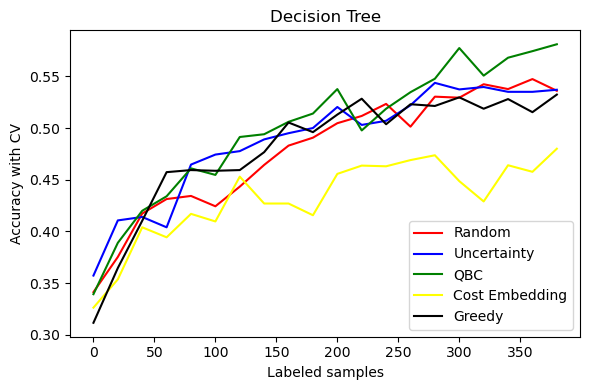

In [3]:
clf_name = 'Decision Tree'
n_samples = 20
batch_size = 20
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle, accuracies = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle, accuracies, color = 'red', label = 'Random')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle, accuracies = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle, accuracies, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle, accuracies = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle, accuracies, color = 'green', label = 'QBC')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle, accuracies = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle, accuracies, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle, accuracies = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle, accuracies, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

### SVM

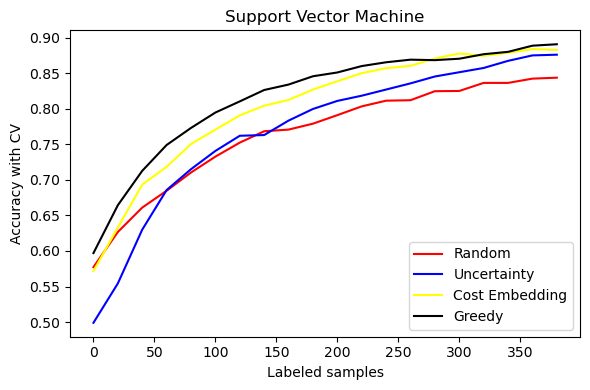

In [5]:
clf_name = 'Support Vector Machine'
n_samples = 20
batch_size = 20
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle, accuracies = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle, accuracies, color = 'red', label = 'Random')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle, accuracies = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle, accuracies, color = 'blue', label = 'Uncertainty')

#clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
#cycle, accuracies = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
#ax.plot(cycle, accuracies, color = 'green', label = 'QBC')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle, accuracies = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle, accuracies, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle, accuracies = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle, accuracies, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()